# Need Lib for Next Instractions

In [1]:
#!/usr/bin/python2.7
# -*- coding: utf-8 -*-
from Kuytu.wikiLog import KuytuLog
from Kuytu.WikiDumpParser import WikiDumpParser
import Kuytu.file_commander as K_fc

import json

##### Create custom Log from Kuytu

In [2]:
log = KuytuLog('BlackBoxCode')

---

# Wiki Dump Seperation Stars

##### Giving Wiki-Dump XML path wait for seperation

In [3]:
# ----------- WIKI DUMP XML PARSE ------------------------------- Execution ----
# XML Getting Memory
print '-'*10 + 'WIKI DUMP XML GETTING MEMORY' + '-'*10 
wdp = WikiDumpParser('./Data/wikidump.xml')
#wdp = WikiDumpParser('./Data/part.xml') # A Part of The Orjinal WIKI-DUMP Data



# Starting to parse all page in XML file
print '-'*14 + 'WIKI DUMP PARSE START' + '-'*13
wdp.extract_pages(StoreAllText = False, NumberofParagraph = 2 )
# ------------------------------------------------------------------------------

----------WIKI DUMP XML GETTING MEMORY----------
--------------WIKI DUMP PARSE START-------------


##### After Seperation saving Seperation Log to our 'Kuytu_log' file

In [4]:
# ----------- WIKI DUMP XML PARSE -------------- Save Log Info (of execution)---
# non_article_count, no_infoBox_count, error_count, number_of_total_article, number_of_article_has_infoBox
log.save_log('WIKI DUMP PARSE - RESULT', json.dumps(wdp.getLog(),indent=4,ensure_ascii=False, encoding='utf8') )
# ------------------------------------------------------------------------------

##### Take the  [Uniq Info Box Type - Hit Count] data and Graph it

In [5]:
# ----------- WIKI DUMP XML PARSE -------------- Save Uniq InfoBoxCounts (B.K.)-
output_path = log.get_output_path()
#print json.dumps( wdp.get_uniqInfoBoxTypes(),indent=4,ensure_ascii=False, encoding='utf8')
K_fc.save_Uniq_InfoBoxTypes( output_path + '/Uniq-BK-Types-Hit-Counts.txt', wdp.get_uniqInfoBoxTypes() )
K_fc.save_Graph( output_path = output_path
                ,data = wdp.get_uniqInfoBoxTypes()
                ,min_repetition = 100
                ,title = 'Uniq-BK-Types-Hit-Counts-Graph(>100)' )
log.logging('Uniq-BK-Types-Hit-Counts-Graph(>100) Saved')
# ------------------------------------------------------------------------------

<Figure size 2000x1100 with 1 Axes>

##### Save The Seperated Pages in 3 Group
    -> Template of the returnin valu of wdp.get_all_articles()
    { 
        "withInfoBox_articles_list" 	: [....articleObject...],
        "withOUTInfoBox_articles_list"  : [..(article_XML_TEXT,Article_Title,Article_Id)..],
        "NonStandart_articles_list" 	: [..article_XML_TEXT..]
    }

In [6]:
# ----------- WIKI DUMP XML PARSE ----------------------- Save Article Pages ---
allArticles = wdp.get_all_articles()


# Pages WithOut InfoBox 
withOUTInfoBoxPagesXMLPath = output_path + 'BulkData/withOUTInfoBoxPages_bulkXML.xml'
withOUTInfoBoxPagesIndexPath = output_path + 'BulkData/withOUTInfoBoxPages_bulkXML_index.txt'
l1 = K_fc.save_XML(withOUTInfoBoxPagesXMLPath, withOUTInfoBoxPagesIndexPath, allArticles['withOUTInfoBox_articles_list'] )

# Pages With InfoBox 
StandartPagesXMLPath = output_path + 'BulkData/withInfoBoxPages_bulkXML.xml'
StandartPagesIndexPath = output_path + 'BulkData/withInfoBoxPages_bulkXML_index.txt'
l2 = K_fc.save_XML(StandartPagesXMLPath, StandartPagesIndexPath, allArticles['withInfoBox_articles_list'] )

# Pages - NonStandart
nonStandartPagesXMLPath = output_path + 'BulkData/NonStandartPages_bulkXML.xml'
nonStandartPagesIndexPath = output_path + 'BulkData/NonStandartPages_bulkXML_index.txt'
l3 = K_fc.save_XML(nonStandartPagesXMLPath, nonStandartPagesIndexPath, allArticles['NonStandart_articles_list'] )

log.logging([l1,l2,l3])  ## Save '.save_XML' log.

# ------------------------------------------------------------------------------

xmlParseCharRef: invalid xmlChar value 55296, line 23152, column 36 (line 23152)
!! [prettyPrintXml] Execution Had Some Errors!!
!-- 690516 Article Saved Successfully -- FileName(withOUTInfoBoxPages_bulkXML.xml)----------!
!-- 180223 Article Saved Successfully -- FileName(   withInfoBoxPages_bulkXML.xml)----------!
xmlParseCharRef: invalid xmlChar value 55357, line 15669, column 514 (line 15669)
!! [prettyPrintXml] Execution Had Some Errors!!
!--   3157 Article Saved Successfully -- FileName(   NonStandartPages_bulkXML.xml)----------!


---
### First part of the Wiki Full Extraction is finished

#### The Outputs are ;
![alttext](./ss/Output_of_seperation.png)


---

---


# Cleaning The Parsed Data (With InfoBoxes)

In [7]:
import Kuytu.Analyzer as Analyzer
from collections import Counter

In [8]:
##### When code runs from begining
Articles_with_BK = allArticles['withInfoBox_articles_list']
allArticles = None

##### Saving  Histogram of Clean DA's owned Articles

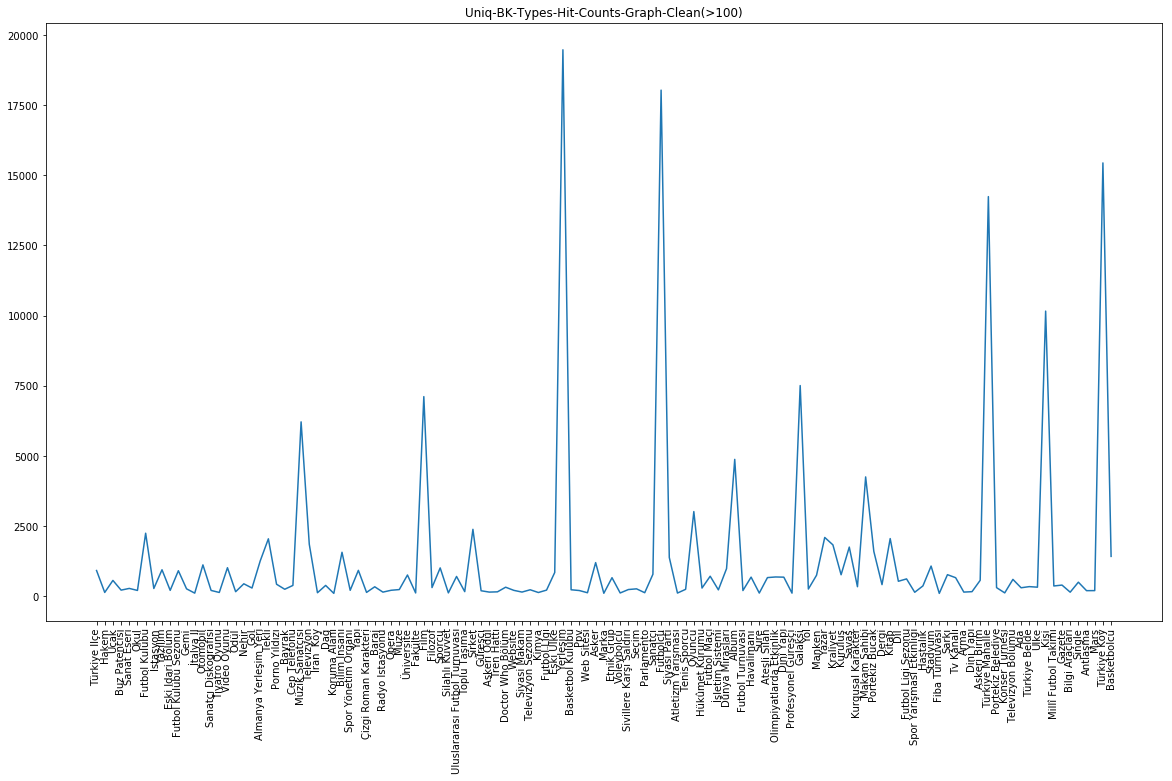

In [27]:
uniq_types = map(lambda a : a.get_infoBox_type() , Articles_with_BK)
c = Counter( uniq_types )
uniq_types_histogram = list(c.items())

output_path = log.get_output_path()
#print json.dumps( wdp.get_uniqInfoBoxTypes(),indent=4,ensure_ascii=False, encoding='utf8')
K_fc.save_Uniq_InfoBoxTypes( output_path + '/Uniq-BK-Types-Hit-Counts-Graph-Clean(>100).txt', uniq_types_histogram )
K_fc.save_Graph( output_path = output_path
                ,data = uniq_types_histogram
                ,min_repetition = 100
                ,title = 'Uniq-BK-Types-Hit-Counts-Graph-Clean(>100)' )
log.logging('Uniq-BK-Types-Hit-Counts-Graph-Clean(>100) Saved')


---
##### According to histogram graphs ınterested domain can be seperated 


# Seperation Interested Domain Related Info Box Types

In [10]:
Interested_Info_Box_Types = [ u'Hakem' ,u'Manken' ,u'Makam Sahibi' ,u'Filozof' ,u'Bilim Insanı',u'Güreşçi' 
                             ,u'Bilim Adamı' ,u'Sporcu' ,u'Buz Patencisi',u'Asker' 
                             ,u'Voleybolcu' ,u'Sanatçı',u'Futbolcu' ,u'Oyuncu' 
                             ,u'Müzik Sanatçısı' ,u'Yazar' ,u'Kraliyet' ,u'Tenis Sporcu' ,u'Profesyonel Güreşçi'
                             ,u'Kişi' ,u'Basketbolcu']
str_of_BKs = json.dumps(Interested_Info_Box_Types,indent = 4,ensure_ascii=False, encoding='utf8').encode('utf-8')
log.save_log('Interested ınfoBoxes are', str_of_BKs )
Interested_articles_with_BK =  filter(lambda a: a.get_infoBox_type() in Interested_Info_Box_Types , Articles_with_BK)


prt_log = '#Articles interested categories '+ str(len(Interested_articles_with_BK))

log.logging(prt_log)
print prt_log


#Articles interested categories 53658


---
##### After the seperation for a certain set of articles can clean
    - InfoBox fields will clean - many banned key or value can be setted.
    
    - Choosen first n paragraphs will clean
    
    - All text of articles will clean
    

# Cleaning The Texts of Articles

##### Cleaning Info Boxes Generally 

In [11]:
from Kuytu.article_cleaner_kit import clean_InfoBoxBulk 

for i,article in enumerate(Interested_articles_with_BK):
    
    # read 
    bulk_BK_of_article  = article.get_infoBoxText()
    # clean
    clean_BK_of_article = clean_InfoBoxBulk(bulk_BK_of_article)
    # write
    Interested_articles_with_BK[i].set_infoBox_clean(clean_BK_of_article)
    
# Eliminate None parsed articles
Interested_articles_with_BK_clean =  filter(lambda a: a.get_cleanInfoBox() != None , Interested_articles_with_BK)

##### Paragraph Cleaning

In [12]:
from Kuytu.article_cleaner_kit import clean_paragraphs

for i,article in enumerate(Interested_articles_with_BK_clean):
    # read 
    paragraphs_of_article  = article.get_bulkParagraphs()
    # clean
    cleaned_paragraphs = clean_paragraphs(paragraphs_of_article)
    # write
    Interested_articles_with_BK_clean[i].set_cleanParagraphs(cleaned_paragraphs)

##### All Text Cleaning

In [13]:
from Kuytu.article_cleaner_kit import clean_bulk_text

for i,article in enumerate(Interested_articles_with_BK_clean):
    # read 
    bulk_text_of_article  = article.get_allBulkText()
    # clean
    cleaned_text = clean_bulk_text(bulk_text_of_article)
    # write
    Interested_articles_with_BK_clean[i].set_cleanText(cleaned_text)

##### Split First 2 sentences with java Zemberek and custom regex

In [14]:
from Kuytu import Zemberek_Runner  
Zemberek_Runner.create_sentence_splittler_input_text(Articles_with_BK)

In [ ]:
from Kuytu import Zemberek_Runner  

Zemberek_Runner.re_read_Sentences(Articles_with_BK)

In [15]:
prt_log = '#Articles parsed clean(InfoBoxes-Paragraphs-AllText-Sentences) '+ str(len(Interested_articles_with_BK_clean))
log.logging(prt_log)
print prt_log    

#Articles parsed clean(InfoBoxes-Paragraphs-AllText-Sentences) 53503


---
##### According to cleaned Info Boxes data can investigating
    - For each InfoBoxType that interested articles can be seperated.
    
    - 2 different name but nearly same types can make one
    
    - Info Boxes data field keys can be mapped to certain value


#  Analysis and Manipulating the Data 

In [16]:
seperated_interested_articles = Analyzer.seperate_articles_according_to_type(Interested_articles_with_BK_clean)



#### format of 'seperated_interested_articles'
    {
     "ınfo_box_type_1" : [.....list of articles....],
     "ınfo_box_type_2" : [.....list of articles....],
     "ınfo_box_type_3" : [.....list of articles....],
     "ınfo_box_type_4" : [.....list of articles....],
     "ınfo_box_type_5" : [.....list of articles....],
     "ınfo_box_type_6" : [.....list of articles....]
     }
     
     
##### Same domain Type merge

In [17]:
try:
    for i,a in enumerate(seperated_interested_articles[u"Bilim Adamı"]):
        seperated_interested_articles[u"Bilim Adamı"][i].set_infoBox_type(u'Bilim Insanı')
    seperated_interested_articles[u"Bilim Insanı"] += seperated_interested_articles[u"Bilim Adamı"]        
    del seperated_interested_articles[u"Bilim Adamı"]
except Exception as e:
    pass

##### Mapping Certain Info Box Types Keys 

In [18]:

map_ = {
    u'Manken' :{
        "yer" : "doğumyeri"
    },
    u'Hakem' : {
        "etkinyıl" : "aktifyıl",
        "yıl" : "aktifyıl",
        "yer" : "doğumyeri"
    }
}         
seperated_interested_articles = Analyzer.datafield_map(map_, seperated_interested_articles)


In [19]:
# Data Fields Counting of InfoBoxes Types

In [20]:
total_count_data, count_data = Analyzer.data_field_counter(seperated_interested_articles)      


In [21]:
output_path = log.get_output_path()
total_article_count = float(len(Interested_articles_with_BK_clean))
subcats_article_counts =  { type_ :float(len(list_)) for type_,list_ in seperated_interested_articles.items()}

Analyzer.save_count_data( path = output_path + 'Counts'
                        , total_count_data =  total_count_data
                        , count_data = count_data
                        , total_first_n = 100
                        , subcat_first_n = 20
                        , total_article_count = total_article_count
                        , subcats_article_counts = subcats_article_counts )

#### Exporting the Data Field Count of The InfoBox Types

#### The Outputs are ;
![alttext](./ss/counter_ex.png)


##### with the knowlegde of count of datafields for each interested category only some of the datafields can be stored


# Deleting Un-Needed Datafields

In [22]:
interested_datafields =  {
    u"Hakem" :               ["ad","doğumtarihi" ,"turnuva"    ,"aktifyıl","doğumyeri"],
    u"Sporcu" :              ["ad","doğumtarihi" ,"spor"       ,"doğumyeri","ülke"],
    u"Kraliyet"  :           ["ad","doğumtarihi" ,"hanedan"    ,"hükümsüresi","ölümtarihi"],
    u"Voleybolcu" :          ["ad","doğumtarihi" ,"pozisyon"   ,"doğumyeri"],
    u"Manken" :              ["ad","doğumtarihi" ,"ulus"       ,"doğumyeri"],
    u"Oyuncu" :              ["ad","doğumtarihi" ,"meslek"     ,"yer","ölümtarihi"],
    u"Asker" :               ["ad","doğumtarihi" ,"rütbesi"    ,"doğumyeri","ölümtarihi"],
    u"Makam Sahibi" :        ["ad","doğumtarihi" ,"makam"      ,"doğumyeri"],
    u"Buz Patencisi" :       ["ad","doğumtarihi" ,"ülke"       ,"koç"],
    u"Profesyonel Güreşçi" : ["ad","doğumtarihi" ,"doğumyeri"],
    u"Kişi" :                ["ad","doğumtarihi" ,"meslek"     ,"doğumyeri","ölümtarihi"],
    u"Futbolcu" :            ["ad","doğumyeri"   ,"pozisyon"   ,"doğumtarihi"],
    u"Tenis Sporcu" :        ["ad","doğumyeri"   ,"oyunstili"  ,"doğumtarihi"],
    u"Bilim Insanı" :        ["ad","doğumyeri"   ,"dalı"       ,"doğumtarihi"],
    u"Filozof" :             ["ad","doğumyeri"   ,"doğumtarihi","çağ"],
    u"Basketbolcu" :         ["ad","doğumyeri"   ,"pozisyon"   ,"doğumtarihi"],
    u"Güreşçi" :             ["ad","doğumyeri"   ,"doğumtarihi","ölümtarihi"],
    u"Yazar" :               ["ad","doğumyeri"   ,"meslek"     ,"doğumtarihi","ölümtarihi"],
    u"Müzik Sanatçısı":      ["ad","artalan"     ,"tarz"       ,"etkinyıllar","meslek"],
    u"Sanatçı" :             ["ad","alanı"       ,"ölümtarihi" ,"ölümyeri"]
}
seperated_interested_articles_hold_interested_DF = Analyzer.hold_interested_datafields(interested_datafields, seperated_interested_articles)



In [23]:
for type_ in seperated_interested_articles_hold_interested_DF.keys():
    seperated_interested_articles_hold_interested_DF[type_] = filter(lambda a : len(a.get_cleanInfoBox().keys()) != 0 , seperated_interested_articles_hold_interested_DF[type_] )



---


# Saving The ~Clean Result Data

#### Excel save

In [24]:
excel_path = output_path + 'CleanData/clean_data_EXCEL.xlsx'
K_fc.export_data_2_excel(excel_path,seperated_interested_articles_hold_interested_DF,interested_datafields)

log.logging('CLEAN DATA SAVED TO EXCEL')

#### XML save

In [25]:
all_clean_articles = [ seperated_interested_articles_hold_interested_DF[type_] for type_ in seperated_interested_articles_hold_interested_DF.keys()]
all_clean_articles = sum(all_clean_articles, [])
# Pages With InfoBox 
StandartPagesXMLPath = output_path + 'CleanData/clean_data_XML.xml'
StandartPagesIndexPath = output_path + 'CleanData/clean_data_XML_index.txt'
l2 = K_fc.save_XML(StandartPagesXMLPath, StandartPagesIndexPath, all_clean_articles, 'clean')

log.logging(['CLEAN DATA SAVED TO XML with INDEX',l2])



!--  53025 Article Saved Successfully -- FileName(             clean_data_XML.xml)----------!


#### Text save

In [26]:
Txt_File_path = output_path + 'CleanData/clean_data_JSON.json'
K_fc.save_txt_file(Txt_File_path, all_clean_articles)

log.logging('CLEAN DATA SAVED TO JSON')